### Imports

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torch
from model.generator import Generator
import config.config as config

### Add Monet Style to Image

* To add Monet style to the arbitrary image we only need Generator part of the network (gen_M model)

In [226]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extract('weights.pt', 'gen_weights')
weights = torch.load("gen_weights/weights.pt", map_location='cpu')

In [211]:
model = Generator(
    img_channels=config.IN_CHANNELS, 
    num_features=config.NUM_FEATURES, 
    num_residuals=config.NUM_RESIDUALS
).to(config.DEVICE)
model.load_state_dict(weights)

<All keys matched successfully>

In [220]:
img = Image.open("data/photo_jpg/0b2454f0e3.jpg")
orig_img = img.resize((256, 256))
img = config.TRANSFORMS(img)
img = img.unsqueeze(axis=0)
print(f"Image shape: {img.shape}")

generated_img = model(img)
print(f"Generated image shape: {generated_img.shape}")
generated_img = generated_img.squeeze(axis=0)

Image shape: torch.Size([1, 3, 256, 256])
Generated image shape: torch.Size([1, 3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


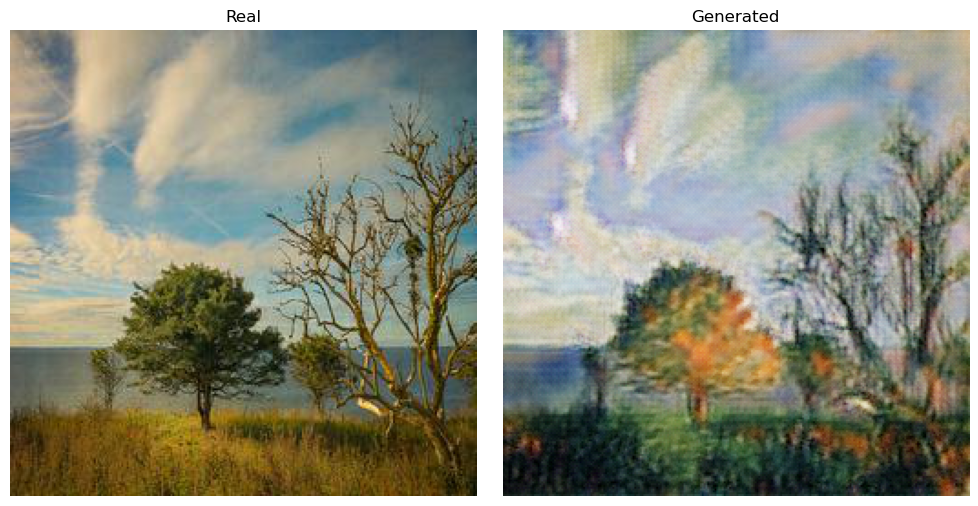

In [221]:
generated_img = generated_img.detach().numpy()

image_array = np.transpose(generated_img, (1, 2, 0))
# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Draw the first image on the left axis
axes[0].imshow(orig_img, cmap='gray')  # You can adjust the colormap according to your image type
axes[0].set_title('Real')
axes[0].axis('off')

# Draw the second image on the right axis
axes[1].imshow(image_array, cmap='gray')
axes[1].set_title('Generated')
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### Last Checkpoint

In [14]:
pth1 = "/home/user/Downloads/logs/datasetfiles/CycleGAN/tb_logs/lightning_logs/version_0/checkpoints/epoch=2-step=42234.ckpt"

ck1 = torch.load(pth1, map_location=torch.device('cpu'))

In [17]:
model1 = Generator(
    img_channels=config.IN_CHANNELS, 
    num_features=config.NUM_FEATURES, 
    num_residuals=config.NUM_RESIDUALS
).to(config.DEVICE)

In [22]:
model1.load_state_dict(ck1["gen_M_state_dict"])

(<All keys matched successfully>, <All keys matched successfully>)

In [24]:
from PIL import Image
from matplotlib import cm

In [206]:
# def show_img(model1, img_paths):
#     ls = []
#     for path in img_paths:
#         real_img = Image.open(path).resize((256,256))
#         img = config.TRANSFORMS(real_img)
#         img = img.unsqueeze(axis=0)
#         out1 = model1(img)
#         out1 = out1.squeeze(axis=0)
#         out1 = out1.detach().numpy()
#         out1 = np.transpose(out1, (1, 2, 0))
#         ls.append(real_img)
#         ls.append(out1)
#     return ls

# image_dir = "data/photo_jpg"

# # List all image files in the directory
# image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

# # Choose 50 random images from the list
# selected_images = random.sample(image_files, 25)

# selected_images = ["data/photo_jpg/"+i for i in selected_images]

# image_list = show_img(model1, selected_images)

# num_rows = 6
# num_cols = 8
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), facecolor="lavender")

# # Flatten the axes array for easier indexing
# axes = axes.flatten()

# # Loop through the images and plot them in the subplots
# for i in range(min(len(image_list), num_rows * num_cols)):
#     image = image_list[i]
#     ax = axes[i]
#     ax.imshow(image, cmap='gray')  # You can adjust the colormap according to your image type
#     ax.axis('off')  # Turn off axis labels
#     if i < 8:
#         title = "Real" if i % 2 == 0 else "Generated"
#         ax.set_title(title)
    
# # Hide any remaining empty subplots
# for i in range(len(image_list), num_rows * num_cols):
#     axes[i].axis('off')

# plt.savefig('test_imgs/results5.png', dpi=300)
# plt.tight_layout()
# plt.show()